# Clustering 2D points

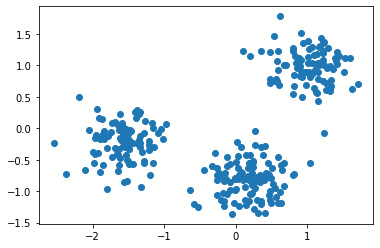

In [6]:
import joblib
import numpy as np
import matplotlib.pyplot as plt

points = joblib.load('/home/pitu/Documents/jupyter/data/points/points.h5')
new_points = joblib.load('/home/pitu/Documents/jupyter/data/points/new_points.h5')


xs=points[:,0]
ys=points[:,1]

plt.scatter(xs,ys)
plt.show()

In [7]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)


[2 1 0 2 1 2 1 1 1 0 2 1 1 0 0 1 0 0 1 1 0 1 2 1 2 0 1 0 0 2 2 1 1 1 0 2 1
 1 2 1 0 2 2 0 2 1 0 0 1 1 1 1 0 0 2 2 0 0 0 2 2 1 1 1 2 1 0 1 2 0 2 2 2 1
 2 0 0 2 1 0 2 0 2 1 0 1 0 2 1 1 1 2 1 1 2 0 0 0 0 2 1 2 0 0 2 2 1 2 0 0 2
 0 0 0 1 1 1 1 0 0 1 2 1 0 1 2 0 1 0 0 1 0 1 0 2 1 2 2 1 0 2 1 2 2 0 1 1 2
 0 2 0 1 2 0 0 2 0 1 1 0 1 0 0 1 1 2 1 1 0 2 0 2 2 1 2 1 1 2 2 0 2 2 2 0 1
 1 2 0 2 0 0 1 1 1 2 1 1 1 0 0 2 1 2 2 2 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0
 1 1 2 0 2 2 0 2 0 2 0 1 1 0 1 1 1 0 2 2 0 1 1 0 1 0 0 1 0 0 2 0 2 2 2 1 0
 0 0 2 1 2 0 2 0 0 1 2 2 2 0 1 1 1 2 1 0 0 1 2 2 0 2 2 0 2 1 2 0 0 0 0 1 0
 0 1 1 2]


## Inspect your clustering

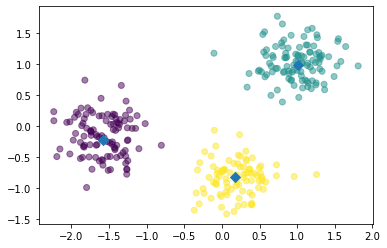

In [8]:

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels,alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D',s=50)
plt.show()


## Evaluating a clustering

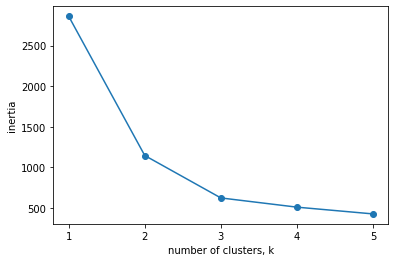

In [10]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

samples = np.genfromtxt('/home/pitu/Documents/jupyter/data/seeds/seeds_dataset.csv', delimiter=',')
varieties = joblib.load('/home/pitu/Documents/jupyter/data/seeds/varieties.h5')

ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [11]:
import pandas as pd
from sklearn.cluster import KMeans

# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)


varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                       0           1          60
1                      70           5           0
2                       0          64          10


## Scaling fish data for clustering

In [13]:
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

#Loading fish data
fish_samples = joblib.load('/home/pitu/Documents/jupyter/data/fish/fish_samples.h5')
fish_species = joblib.load('/home/pitu/Documents/jupyter/data/fish/fish_species.h5')

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
         ('kmeans', KMeans(n_clusters=4))]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)



## Clustering the fish data

In [14]:
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(fish_samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(fish_samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels' : labels, 'species' : fish_species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['species'])
ct

species,Bream,Pike,Roach,Smelt
labels,,,,
0,33,0,1,0
1,0,0,0,13
2,0,17,0,0
3,1,0,19,1


# Visualizing Hierarchies

## Distance between clusters

### "Complete linkage" -> distance between clusters is max. distance between their samples

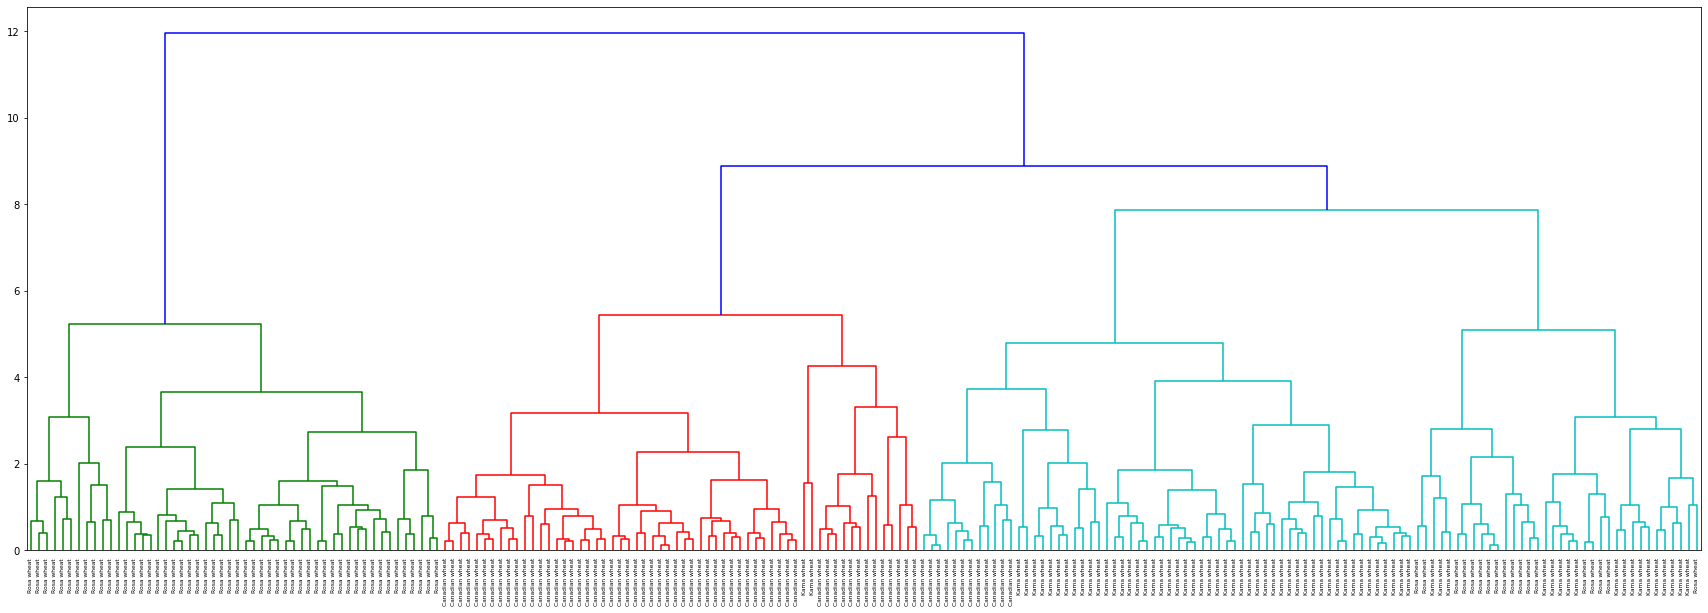

In [15]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from pylab import rcParams

# Calculate the linkage: mergings
mergings = linkage(samples,method='complete')

# Plot the dendrogram, using varieties as labels
rcParams['figure.figsize'] = 30, 10
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)

plt.show()


### Extracting cluster labels using fcluster

In [16]:
from scipy.cluster.hierarchy import fcluster

labels = fcluster(mergings, 6, criterion='distance')
print(labels)
pairs = pd.DataFrame({'labels': labels,'varieties': varieties})
print(pairs.sort_values('labels'))

[3 3 3 3 4 3 3 3 4 4 4 3 3 3 3 3 2 4 3 3 3 3 4 3 3 4 3 3 3 3 3 4 3 3 3 4 4
 4 4 2 3 3 3 4 4 3 4 4 4 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 4 4 1
 4 4 1 1 1 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 4 1 4 1 1 1 1 4 1 1 4 4 4 4 1 4 4 4 2 2 2 2 2 2 3 2
 3 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 3 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2
 2 2 2 2 2 2 2 3 2 2 2 2 2 3 3 2 3 2 2 2 3 2 2 3 2]
     labels   varieties
104       1  Rosa wheat
112       1  Rosa wheat
113       1  Rosa wheat
78        1  Rosa wheat
77        1  Rosa wheat
..      ...         ...
133       4  Rosa wheat
48        4  Kama wheat
22        4  Kama wheat
139       4  Rosa wheat
100       4  Rosa wheat

[210 rows x 2 columns]


### "Single Linkage" -> distance between clusters is min. distance between their samples

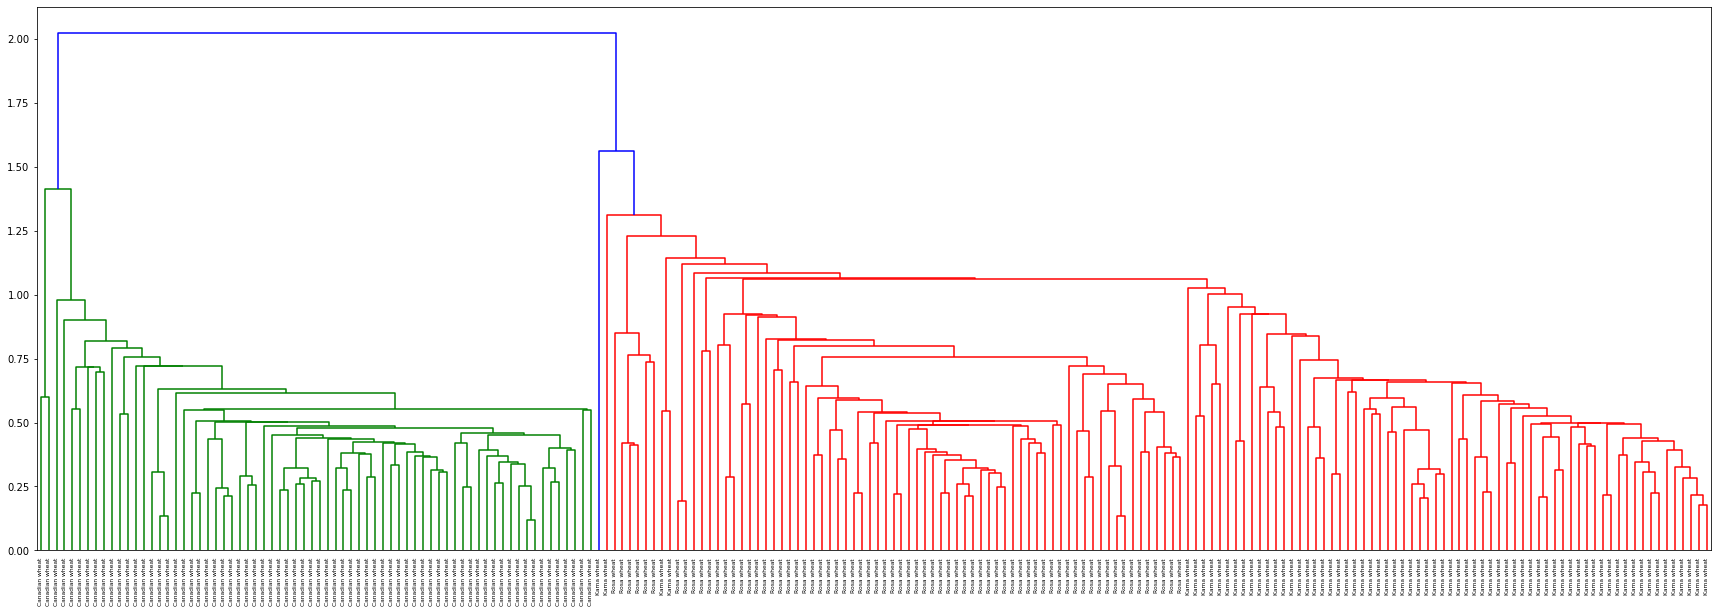

In [17]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from pylab import rcParams

# Calculate the linkage: mergings
mergings = linkage(samples,method='single')

# Plot the dendrogram, using varieties as labels
rcParams['figure.figsize'] = 30, 10
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)

plt.show()

# t-SNE for 2-dimensional maps

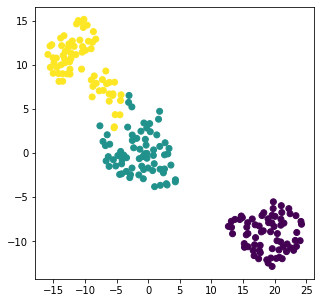

In [18]:
# Import TSNE
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder


# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Categorical varieties
label_encoder = LabelEncoder()

varieties_cat = label_encoder.fit_transform(varieties)
# Scatter plot, coloring by variety_numbers
rcParams['figure.figsize'] = 5, 5
plt.scatter(xs,ys,c=varieties_cat)
plt.show()


# Visualizing the PCA transformation

## Correlated data in nature

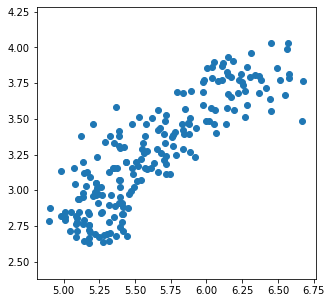

0.8604149377143469


In [19]:
import numpy as np

grains = np.asarray(samples[:,3:5])

# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)

# Display the correlation
print(correlation)

## Decorrelating the grain measurements with PCA

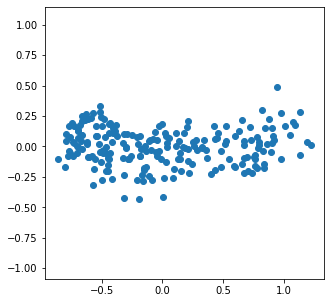

-6.10405823109339e-17


In [20]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

# Intrinsic dimension

## The first principal component

The first principal component of the data is the direction in which the data varies the most


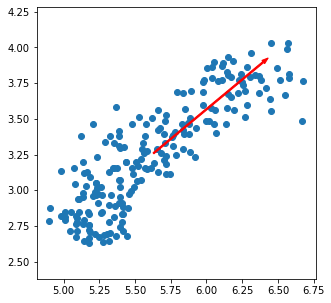

In [21]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

## Variance of the PCA features

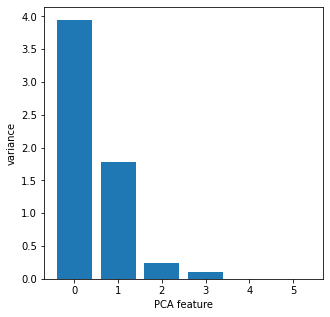

In [22]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create steps

steps = [('scaler' , scaler),
        ('PCA' , pca)]
# Create pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to 'samples'
pipeline.fit(fish_samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


# Dimension reduction with PCA

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA(n_components=2)

# Create steps

steps = [('scaler' , scaler),
        ('PCA' , pca)]
# Create pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to 'samples'
pipeline.fit(fish_samples)

# Transform the scaled samples: pca_features
pca_features = pipeline.transform(fish_samples)

# Print the shape of pca_features
print(pca_features.shape)

(85, 2)


## A tf-idf word-frequency array

## Clustering Wikipedia 

In [22]:
import pandas as pd
from scipy.sparse import csr_matrix

df = pd.read_csv('data/wiki/wikipedia-vectors.csv', index_col=0)
wiki_articles = csr_matrix(df.transpose())
titles = list(df.columns)

## A tf-idf word-frequency array
It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix

In [ ]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(wiki['text'])

# Print result of toarray() method
#print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
#print(words)


### Creating Pipeline
TruncatedSVD is able to perform PCA on sparse arrays in csr_matrix format, such as word-frequency arrays

In [ ]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

#Create steps
steps=[('svd',TruncatedSVD(n_components=50)),('kmeans', KMeans(n_clusters=6))]

# Create a pipeline: pipeline
pipeline = Pipeline(steps)


# Fit the pipeline to articles
pipeline.fit(wiki_articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(wiki_articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))

In [ ]:
# Import TSNE
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder


# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(wiki_articles)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Categorical varieties
label_encoder = LabelEncoder()

varieties_cat = label_encoder.fit_transform(titles)
# Scatter plot, coloring by variety_numbers
#rcParams['figure.figsize'] = 5, 5
plt.scatter(xs,ys,c=varieties_cat)
plt.show()


# NMF

In [23]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(wiki_articles)

# Transform the articles: nmf_features
nmf_features = model.transform(wiki_articles)

# Print the NMF features
#print(nmf_features)
#print(model.components_)


## NMF features of the Wikipedia articles

In [ ]:

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features,index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

## NMF learns topics of documents
When NMF is applied to documents, the components correspond to topics of documents, and the NMF features reconstruct the documents from the topics

In [ ]:
words = open("data/wiki/wikipedia-vocabulary-utf8.txt", "r")

list_of_words = []
for line in words:
  stripped_line = line.strip()
  list_of_words.append(stripped_line)

words.close()

In [ ]:
# Import pandas
import pandas as pd

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_,columns=list_of_words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 0: component
component = components_df.iloc[0]

# Print result of nlargest
print(component.nlargest())


## Explore the LED digits dataset

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/LCD/lcd_digits.csv')
samples = np.asarray(df)

In [ ]:
# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = samples[7,:]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape((13,8))

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()


## NMF learns the parts of images

In [ ]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

# Import NMF
from sklearn.decomposition import NMF 

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)
print(features)
# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

## Which articles are similar to 'Cristiano Ronaldo'?

In [25]:
# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features,index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


## Recommend musical artists part I

In [103]:
import pandas as pd 

matrix = pd.read_csv('data/musical_artists/scrobbler-small-sample.csv')

artists = pd.read_csv('data/musical_artists/artists.csv')

print(matrix.describe())
print(artists.describe())

       user_offset  artist_offset     playcount
count  2894.000000    2894.000000   2894.000000
mean    226.465446      54.123013    195.353490
std     141.143434      32.216077    442.941714
min       0.000000       0.000000     51.000000
25%     102.000000      24.000000     70.000000
50%     221.000000      56.000000    104.000000
75%     343.000000      82.000000    190.750000
max     499.000000     110.000000  12330.000000
          artist
count        111
unique       111
top     Static-X
freq           1


In [116]:
matrix.groupby('user_offset').count().index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            490, 491, 492, 493, 494, 495, 496, 497, 498, 499],
           dtype=&#39;int64&#39;, name=&#39;user_offset&#39;, length=500)

In [131]:
data = pd.DataFrame(index=artists.artist ,columns=list(matrix.groupby('user_offset').count().index)).fillna(0)
data.head()
for idx in matrix.index:
    x=matrix.user_offset[idx]
    y=matrix.artist_offset[idx]
    data.iloc[y,x] = matrix.playcount[idx]
data.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
artist,,,,,,,,,,,,,,,,,,,,,
Massive Attack,0,0,105,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sublime,128,211,0,0,0,0,0,0,0,0,...,0,0,0,270,0,105,97,0,0,0
Beastie Boys,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Neil Young,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dead Kennedys,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
data_csr=csr_matrix(np.array(data, dtype=float))

In [134]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import Pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

#Create stepts

steps = [('scaler',scaler),('nmf',nmf),('normalizer',normalizer)]

# Create a pipeline: pipeline
pipeline = Pipeline(steps)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(data_csr)


## Recommend musical artists part II

In [135]:

# Create a DataFrame: df
df4 = pd.DataFrame(norm_features,index=artists.artist)
#print(df4.head())

# Select row of 'Bruce Springsteen': artist
artist = df4.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df4.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())


artist
Bruce Springsteen    1.000000
Neil Young           0.956048
Van Morrison         0.872805
Leonard Cohen        0.866709
Bob Dylan            0.859707
dtype: float64
